![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

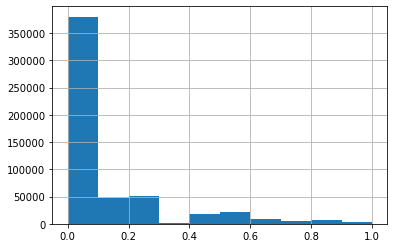

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1

import re

# Función que realiza el preprocesamiento de texto

def preprocess_text(text):
    
    text = text.lower()                    # Se convierte el texto a minúsculas
    text = re.sub(r'\d+', '', text)        # Se eliminan los caracteres numéricos
    return text

# Se crea el vectorizador

vectorizer = CountVectorizer(max_features=100, lowercase=False, preprocessor=preprocess_text)

# Se crean los vectores a partir del texto y el vectorizador

X_traincv = vectorizer.fit_transform(X_train).toarray()

# Se utiliza un arbol de regresión para entrenar el modelo y realizar las predicciones

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_traincv, y_train)

predictions = regressor.predict(vectorizer.transform(X_test))

# Se reporta el error de predicción

mse_1 = metrics.mean_squared_error(y_test, predictions)
print(mse_1)

0.07644538435968146


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 2

# Se crea el vectorizador, con los mismos par+ametros del vectorizador del punto anterior, pero incorporando el parámetro
# n_gram_range = (3,3), para que solo se generen trigramas a partir del texto

vectorizer_2 = CountVectorizer(max_features=100, lowercase=False, preprocessor=preprocess_text, ngram_range=(3, 3))

# Se crean los vectores a partir del texto y el vectorizador con trigramas

X_traincv_2 = vectorizer_2.fit_transform(X_train)

# Se utiliza un arbol de regresión para entrenar el modelo y realizar las predicciones

regressor.fit(X_traincv_2, y_train)
predictions_2 = regressor.predict(vectorizer_2.transform(X_test))

# Se reporta el error de predicción

mse_2 = metrics.mean_squared_error(y_test, predictions_2)
print(mse_2)

0.04008904679990923


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3

#### Descripción

TF-IDF significa "Term Frequency - Inverse Document Frequency" por sus siglas en inglés o "Frecuencia de términos - Frecuencia inversa de documentos", traducido al español. 

Básicamente, es una técnica estadística que penaliza la frecuencia de un término o palabra en un documento por la abundancia con la cual dicha palabra aparece en el conjunto de documentos o corpus. Así, a diferencia de *Count Vectorizer*, el valor asignado a cada término no se limita solo a capturar la frecuencia con la cual aparece este en un documento, sino también qué tan único es el término dentro de todo el corpus.

Así, a un término que aparece poco dentro de un documento, pero que únicamente aparece en ese documento, se le asignaría una importancia muy alta en el registro que contiene la información de ese documento en particular. Lo anterior bajo la lógica de que, al ser un término relativamente único dentro del corpus, puede contener información importante para diferenciar ese documento de los demás. Por ejemplo, en el caso que estamos analizando en este trabajo, se esperaría encontrar palabras ofensivas en pocos de los textos, por lo que la presencia de estas palabras en un texto podría ser un factor explicativo de su nivel de toxicidad.

Por el contrario, a una palabra que aparezca mucho en un documento, pero que aparezca en casi todos los documentos, se le asignaría una importancia relativamente baja en todos los registros, pues es poco probable que ayude a diferenciar textos entre sí. Por ejemplo, pronombres o artículos que pueden aparecer multiples veces en la mayoría, si no en la totalidad, de los textos, es poco probable que ayuden a diferenciar los textos entre sí.

La importancia más alta de un término para un registro se asignaría a términos que aparecen muchas veces en un documento (tienen un *term frequency* alto), pero aparecen en pocos documentos (tienen un *document frequency* bajo, o lo que es lo mismo, un *inverse document frequency* alto)

Así es como se calcula la importancia en el TF-IDF:

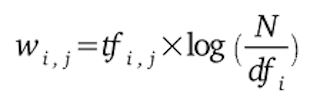

Donde: 

- tf_i,j (term frequency) es el número de ocurrencias de la palabra i en el documento j 
- df_i (document frequency) es el número de documentos que contienen la palabra i 
- N es el número total de documentos 

Analizando esta fórmula, podemos observar que el término logarítmico hace que las palabras que aparecen en todos los textos tengan una una importancia de 0, pues, en este caso, el término dentro del logaritmo sería 1. Gracias a esto, se puede reducir la dimensionalidad del problema, eliminando los términos que son muy frecuentes y no proporcionan información adicional sobre las características de los textos, lo cual no sería posible al utilizar *Count Vectorizer*.

No obstante, aunque el TF-IDF puede proporcionar una buena comprensión de la importancia de las palabras, al igual que *Count Vectorizer*, su desventaja es que no proporciona información lingüística sobre las palabras, como el significado real de las mismas, la similitud con otras palabras, etc.

Otra de las posibles desventajas de utilizar TF-IDF es que si se quiere trabajar con n-gramas, probablemente se pierden la mayoría de las ventajas del algoritmo, al tiempo que se asume un costo computacional mayor para calcular las importancias. Lo anterior se debe a que, en relación a los unigramas, es poco probable que los n-gramas se repitan a lo largo de varios documentos, especialmente a medida que n incrementa, con lo cual la mayoría de términos tendrían un *inverse document frequency* alto y el modelo se aproximaría al de *Count Vectorizer*.

##### Referencias
- Count Vectorizer vs TFIDF Vectorizer | Natural Language Processing. Sheel Saket. Enero 12, 2020. Tomado de: https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket/

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 4

# Se importa el vectorizador TF-IDF de la librería sklearn

from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf

# Se crea el vectorizador TF-IDF con los mismos parámetros utilizados para el CountVectorizer

vectorizer_3 = tf_idf(max_features=100, lowercase=False, preprocessor=preprocess_text)

# Se utiliza un arbol de regresión para entrenar el modelo y realizar las predicciones

X_traincv_3 = vectorizer_3.fit_transform(X_train)
regressor.fit(X_traincv_3, y_train)

predictions_3 = regressor.predict(vectorizer_3.transform(X_test))

# Se reporta el error de predicción

mse_3 = metrics.mean_squared_error(y_test, predictions_3)
print(mse_3)

0.0710444082552932


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

Comparación por MSE de los 4 modelos


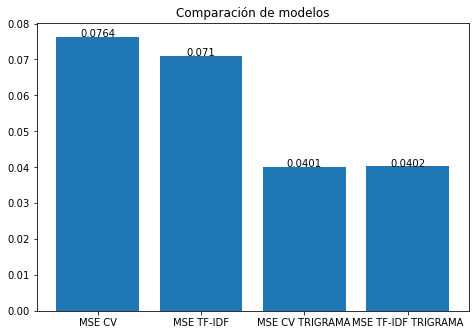

In [11]:
# Celda 5

# Se crea un modelo adicional con vectorizador TF-IDF utilizando trigramas para ampliar la comparación de modelos

vectorizer_4 = tf_idf(max_features=100, lowercase=False, preprocessor=preprocess_text, ngram_range=(3, 3))

# Se utiliza un arbol de regresión para entrenar el modelo y realizar las predicciones

X_traincv_4 = vectorizer_4.fit_transform(X_train)
regressor.fit(X_traincv_4, y_train)

predictions_4 = regressor.predict(vectorizer_4.transform(X_test))

# Se reporta el error de predicción

mse_4 = metrics.mean_squared_error(y_test, predictions_4)

import matplotlib.pyplot as plt

print('Comparación por MSE de los 4 modelos')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['MSE CV', 'MSE TF-IDF', 'MSE CV TRIGRAMA', 'MSE TF-IDF TRIGRAMA']
ejeY = [round(mse_1, 4), round(mse_3, 4), round(mse_2, 4), round(mse_4, 4)]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i],ha='center')
        
addlabels(ejeX,ejeY,plt)

plt.show()

### Conclusiones

De acuerdo con la gráfica de arriba, se pueden realizar las siguientes observaciones:

- El uso de procesamiento de lenguaje natural ayuda a predecir la probabilidad de que un comentario sea tóxico con una precisión relativamente alta, pues el error cuadrático medio es de apenas 0,076 en el peor de los casos y cercano a 0,04 en el mejor modelo.
- El uso de n-gramas mejora el desempeño de los modelos, pues, tanto para *Count Vectorizer* , como para TF-IDF, el error cuadrático medio se reduce en más de 40% al utilizar trigramas, con respecto a los modelos que usan unigramas. Introducir trigramas a los modelos genera datos más contextualizados y por ende ayuda a mejorar el poder predictivo.
- El modelo TF-IDF con unigramas obtiene mejores resultados que el modelo *Count Vectorizer* con unigramas, pues como se mencionó en la explicación del punto 3, el compnente de *inverse document frequency* introducido por este modelo ayuda a considerar la importancia de términos poco frecuentes en el conjunto de datos para diferenciar textos entre sí.
- Como se plantea en el punto 3, el modelo TF-IDF pierde sus ventajas cuando se trabaja con n-gramas y su desempeño es muy similar al obtenido por *Count Vectorizer*.